# Exercise 3, analyzing the Baltic Sea

In [1]:
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ds = xr.open_dataset("data/ocean_day3d.nc")

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/boergel/Documents/work/climateoftheocean/data/ocean_day3d.nc'

When you start your work at IOW you will start by reading literature about the dynamics of the Baltic Sea. Soon you will notice that nearly every article starts with a paragraph similar to:

> "The hydrography of the Baltic Sea depends on the water exchange with the world ocean which is restricted by the narrows and sills of the Danish Straits and on river runoff into the Baltic [Meier and Kauker, 2003]."



Look at this figure ([Meier and Kauker, 2003](https://agupubs.onlinelibrary.wiley.com/cms/asset/144f12b6-8897-474b-b4e7-4dc1ad3c8faa/)) and zoom on the connection between the world ocean and the Baltic Sea.

The coordinates are : `lon=8-17, lat=53-59`

![](https://agupubs.onlinelibrary.wiley.com/cms/asset/144f12b6-8897-474b-b4e7-4dc1ad3c8faa/jgrc9306-fig-0001.png)

Check you data first. In MOM we use different names for lon, lat and depth:

lon = xt_ocean
lat = yt_ocean
depth = st_ocean

xarray allows you to select areas using

```python

ds.sel(xt_ocean=slice(lon1, lon2), yt_ocean=slice(lat1, lat2))
```

In [ ]:
ds.dims

Frozen({'xt_ocean': 91, 'yt_ocean': 102, 'time': 11, 'nv': 2, 'xu_ocean': 91, 'yu_ocean': 102, 'st_ocean': 100, 'st_edges_ocean': 101, 'sw_ocean': 100, 'sw_edges_ocean': 101})

In [ ]:
danish_straits = ds.sel(xt_ocean=slice(,), yt_ocean=slice(,))

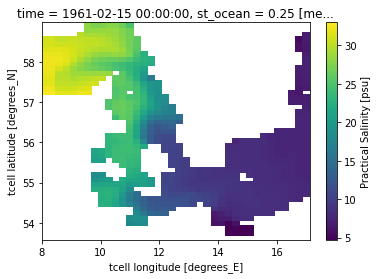

In [ ]:
# Instead of selecting coordinate, we can also use 
# index selction using .isel
# we are selecting the surface and the first timestep of 
# the variable salt and plot it

danish_straits.salt.isel(st_ocean=0, time = 0).plot()

**Question 1:** What is the first thing you notice, when you compare to the realistic bathymetry above?

Answer: 

**Question 2:** Look at the colobar. What role play the Danish Straits for the salinity of the Baltic Sea?

Answer:

Following on common Baltic Sea introductions, you will find something similar to:

> The inflow of freshwater by river runoff and a positive net precipitation cause a positive water balance with respect to the North Sea. The positive water balance leads to strong gradients in salinity and ecosystem variables (Reckermann et al., 2008).

So let's look at the mean surface salinity!

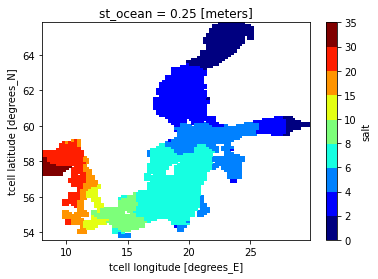

In [ ]:
level = [0,2,4,6,8,10,15,20,30,35]

f, ax = plt.subplots(1)

ds.salt.isel(st_ocean=0).mean("time").plot(levels=level, cmap=plt.cm.jet)

Following Markus second sentence of his paper,

> In the long-term mean, high-saline water from the Kattegat enters the Baltic proper and low-saline water leaves the Baltic because of the freshwater surplus.

Think about the exchange flow of the Baltic Sea. How would the profile of a transect a 16°E look like? 

In [ ]:
# We first select the latitude range 53-57, then longitude at 16°E
# note that by using `method="nearest"` we will search for the nearest lon coordinate to 13

transect = ds.sel(yt_ocean=slice(53, 57)).sel(xt_ocean=16, method="nearest")

This leaves us with the dimensions: time, depth and latitude

In [ ]:
transect.salt.dims

('time', 'st_ocean', 'yt_ocean')

Markus talks about the long-term mean in his paper. So start by averaging over the time dimension.

using 

```python
.mean("time")
```

In [ ]:
transect_mean_time = transect.mean("time")

Now we can average over the latitude, to give us a depth profile.

In [ ]:
transect_mean_time_latitude = transect_mean_time.mean("yt_ocean")

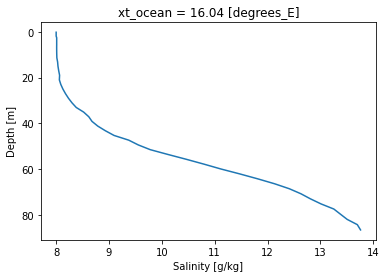

In [ ]:
f, ax = plt.subplots(1)
transect_mean_time_latitude.salt.plot(ax=ax, y="st_ocean")
ax.set_ylabel("Depth [m]")
ax.set_xlabel("Salinity [g/kg]")
ax.invert_yaxis()

Following along with Markus Paper:

> The bottom water in the deep subbasins is ventilated mainly by large perturbations, so-called major Baltic saltwater inflows [Matthäus and Franck, 1992; Fischer and Matthäus, 1996]. 

In this year we have no strong inflow. However, we can notice inflows of high saline water analyzing the station located in the Arkona Basin.

In [ ]:
by2 = ds.sel(xt_ocean = 16.2, yt_ocean = 55.5, method="nearest")

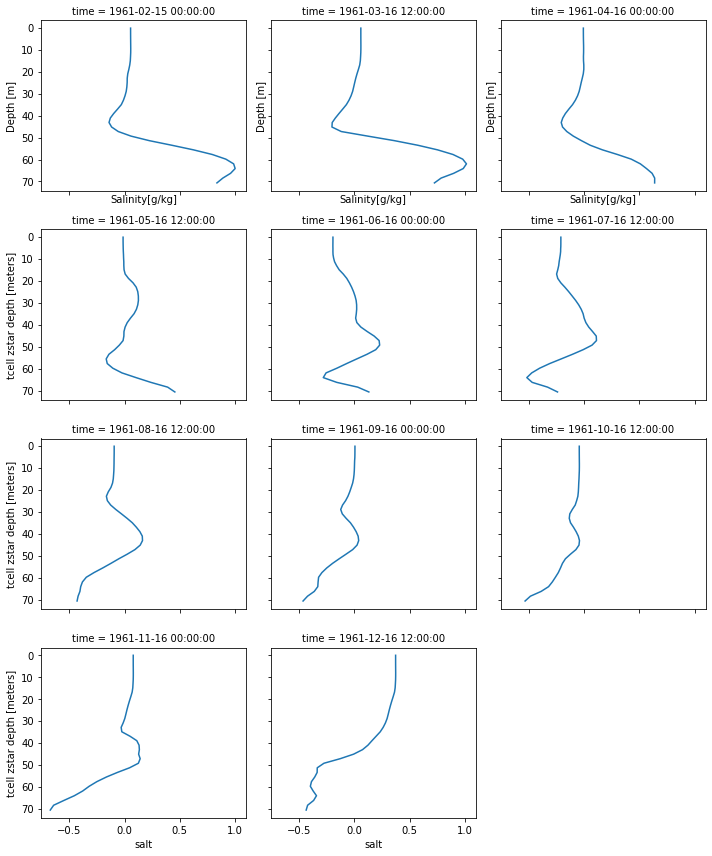

In [ ]:
g = (by2.salt - by2.salt.mean("time")).plot(col="time", col_wrap = 3, y="st_ocean")

for ax in g.axes[0]:
    ax.invert_yaxis()
    ax.set_xlabel("Salinity[g/kg]")
    ax.set_ylabel("Depth [m]")

g.fig.tight_layout()

**Question 3:** Focus on the month of February. What is happening?

These saline inflows are important for the oxygen supply of the deeper layers, since due to the strong stratification in the Baltic Sea only layers above the permanent halocline are directly influenced by the atmosphere and therefore supplied with oxygen (Mohrholz et al., 2015).

# Seasonal cycle of the temperature

We will now look at the depth-averaged seasonal cycle of the Baltic Sea.

In [ ]:
ds_temp_season = ds.temp.resample(time="1M").mean("time").mean("st_ocean")

In [3]:
(ds_temp_season-ds_temp_season.mean("time")).plot(col="time", col_wrap =3)

NameError: name 'ds_temp_season' is not defined

**Question 4:** Above you see the deviation from the mean temperature of the Baltic Sea for every single month. Try to discuss the differences for every month.

## Sea Ice

During winter time parts of the Baltic Sea are covered with sea ice. The sea ice influences the air-sea interaction. Sea ice directly influences temperature, salinity, but also the transfer of momentum into the ocean. The annual ice cover varies from only being present in the Bothnian Bay to a nearly fully covered Baltic Sea. Therefore, the Baltic Sea is exposed to great variation in sea ice cover.

In [113]:
ice = xr.open_dataset("data/ice_day.nc")

Let's start by analyzing the seasonal sea ice cover.

In [117]:
ice

<xarray.Dataset>
Dimensions:      (xt: 91, xb: 92, yt: 102, yb: 103, time: 11, nv: 2, ct: 5, xv: 91, yv: 102)
Coordinates:
  * xt           (xt) float64 8.12 8.36 8.6 8.84 9.08 ... 29.0 29.24 29.48 29.72
  * xb           (xb) float64 8.0 8.24 8.48 8.72 8.96 ... 29.12 29.36 29.6 29.84
  * yt           (yt) float64 53.64 53.76 53.88 54.0 ... 65.4 65.52 65.64 65.76
  * yb           (yb) float64 53.58 53.7 53.82 53.94 ... 65.46 65.58 65.7 65.82
  * time         (time) object 1961-02-15 00:00:00 ... 1961-12-16 12:00:00
  * nv           (nv) float64 1.0 2.0
  * ct           (ct) float64 0.0 0.1 0.3 0.7 1.1
  * xv           (xv) float64 8.24 8.48 8.72 8.96 9.2 ... 29.12 29.36 29.6 29.84
  * yv           (yv) float64 53.7 53.82 53.94 54.06 ... 65.46 65.58 65.7 65.82
Data variables: (12/26)
    FRAZIL       (time, yt, xt) float32 ...
    CN           (time, ct, yt, xt) float32 ...
    MI           (time, yt, xt) float32 ...
    HI           (time, yt, xt) float32 ...
    HS           (time, yt, xt) float32 ...
    TS           (time, yt, xt) float32 ...
    ...           ...
    EVAP         (time, yt, xt) float32 ...
    RUNOFF       (time, yt, xt) float32 ...
    average_T1   (time) datetime64[ns] ...
    average_T2   (time) datetime64[ns] ...
    average_DT   (time) timedelta64[ns] ...
    time_bounds  (time, nv) timedelta64[ns] ...
Attributes:
    filename:   ice_day.nc
    title:      ERGOM-MOM510 8 n.m. Baltic Hiresaff 1850-2009
    grid_type:  regular
    grid_tile:  N/A

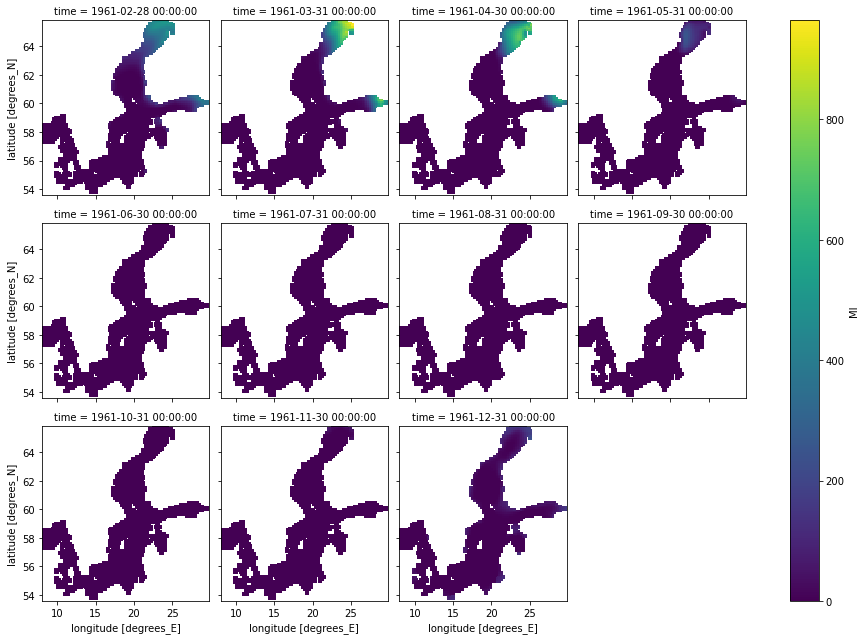

In [128]:
ice.MI.resample(time="1M").mean().plot(col="time", col_wrap=4)

**Question 5:** Why do we find sea ice in the North but not in the central Baltic Sea?